In this notebook I clean a dataset obtained from the Metropolitan Museum of Art. 

In [1]:
#first, import the necessary libraries for data management and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
%matplotlib inline

In [3]:
#second, load the dataset
data = pd.read_csv('MetObjects.csv')

/Users/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#third, do some basic data observation to get an idea what this dataset contains, 
#and what are the main problems with it
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


In [5]:
#this is a pretty large dataset: 448,203 observations over 43 variables. 
#The varying number of non-null objects suggests that there may be some work on missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448203 entries, 0 to 448202
Data columns (total 43 columns):
Object Number              448203 non-null object
Is Highlight               448203 non-null bool
Is Public Domain           448203 non-null bool
Object ID                  448203 non-null int64
Department                 448203 non-null object
Object Name                445568 non-null object
Title                      416906 non-null object
Culture                    186518 non-null object
Period                     71882 non-null object
Dynasty                    23018 non-null object
Reign                      10817 non-null object
Portfolio                  20370 non-null object
Artist Role                259909 non-null object
Artist Prefix              88928 non-null object
Artist Display Name        261111 non-null object
Artist Display Bio         224064 non-null object
Artist Suffix              10212 non-null object
Artist Alpha Sort          261088 non-null object


In [6]:
#only three numeric variables.
#Looks like the two data variables will potentially need to be converted to a readable date format
data.describe()

,Object ID,Object Begin Date,Object End Date
count,448203.000000,4.482030e+05,4.482030e+05
mean,346272.873187,1.390817e+03,1.493446e+03
std,206914.987003,2.779816e+04,2.778712e+04
min,1.000000,-9.500000e+04,-3.500000e+04
25%,198808.500000,1.567000e+03,1.600000e+03
50%,349816.000000,1.800000e+03,1.850000e+03
75%,481764.500000,1.895000e+03,1.910000e+03
max,750830.000000,1.859186e+07,1.859186e+07


Two main takeaways:
- there could be some duplicate values.
- there are a few variables that have missing values and need to be investigated.


In [7]:
#duplicates - check if there are overall duplicates in the dataset
data.duplicated().sum()
#zero duplicated accross all lines

0

In [8]:
#duplicated object IDs should uniquely identify the dataset
data['Object ID'].duplicated().sum()

0

In [9]:
data['Object Number'].duplicated().sum()

2576

In [10]:
data[data['Object Number'].duplicated(keep=False)].sort_values('Object Number')
#seems that object number is duplicated for completely different works. Not much we can do about that, without any 
#info on what exactly the Object Number represents. As ling as Object ID is unique, this will the the unique identifier.


,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
264537,01.2.10,False,True,391695,Drawings and Prints,Print,Musette Player (Le Joueur de Musette),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
66331,01.2.10,False,False,78938,Costume Institute,Fichu,Fichu,French,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
245558,01.2.4,False,False,371969,Drawings and Prints,Print,Marin Mersenne,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
124314,01.2.4,False,False,212677,European Sculpture and Decorative Arts,Piece,Piece,French,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Textiles-Laces,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
124316,01.2.6,False,False,212679,European Sculpture and Decorative Arts,Fragment,Fragment,Belgian,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Textiles-Laces,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
245551,01.2.6,False,True,371962,Drawings and Prints,Print,Player of a transverse flute,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
233770,06.1214,False,False,359653,Drawings and Prints,Book,Select Views in Great Britain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Books,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
307499,06.1214,False,True,435584,European Paintings,"Painting, predella panel",The Nativity,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Paintings,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
309382,09.1.1,False,True,437751,European Paintings,Painting,"Richmond Castle, Yorkshire",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Paintings,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
419858,09.1.1,False,False,692402,Drawings and Prints,Print,Mississippi Bear,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


In [11]:
data['Title'].duplicated().sum()

222648

In [12]:
dup_title = pd.DataFrame(data[data['Title'].duplicated(keep=False)].sort_values('Title'))
#there are, however many title duplicates. Need to investigate this subset more, thus will make a separate DF

In [13]:
dup_title

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
338919,1986.438,False,False,484676,Modern and Contemporary Art,Printed Silk Length,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Textiles-Painted and Printed,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
337322,1984.117.1ab,False,False,483005,Modern and Contemporary Art,Coffee pot with Lid,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ceramics-Porcelain,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
274027,63.350.214.172.260,False,False,401408,Drawings and Prints,"Baseball card, photograph","""$10,000"" Kelly, Boston, from the Old Judge se...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
274029,63.350.214.172.262,False,False,401410,Drawings and Prints,"Baseball card, photograph","""$10,000"" Kelly, Boston, from the Old Judge se...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
274030,63.350.214.172.263,False,False,401411,Drawings and Prints,"Baseball card, photograph","""$10,000"" Kelly, Boston, from the Old Judge se...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
274026,63.350.214.172.259,False,False,401407,Drawings and Prints,"Baseball card, photograph","""$10,000"" Kelly, Boston, from the Old Judge se...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
274028,63.350.214.172.261,False,False,401409,Drawings and Prints,"Baseball card, photograph","""$10,000"" Kelly, Boston, from the Old Judge se...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
274454,63.350.214.172.416,False,True,401835,Drawings and Prints,"Baseball card, photograph","""$10,000"" Kelly, Chicago, from the Old Judge s...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
274455,63.350.214.172.417,False,True,401836,Drawings and Prints,"Baseball card, photograph","""$10,000"" Kelly, Chicago, from the Old Judge s...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
446127,"Burdick 536, W539.7",False,False,746294,Drawings and Prints,Print,"""A Lucky Find"" trade card from the Charlie Cha...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


We found a lot of duplicate titles. From the first glance it seems that most of these entries share everything except for ObjectID, Object Number. This is the next thing that needs to be found - title duplicates that only differe in objectIDs and object numbers.

In [14]:
#create a column name object to easily refer to all variables
columns = data.columns.tolist()
columns.remove('Object Number')
columns.remove('Object ID')
#columns

In [15]:
dup_title[columns].duplicated().sum()
#seems like there are more variables that are duplicates

0

In [16]:
dup_title['Link Resource'].duplicated().sum()

0

In [17]:
#will remove links variables and see if there are still no duplicates
#columns.remove('Link Resource')
dup_title[columns].duplicated().sum()
#seems like three variables determine if there are duplicates in the dataset.
#investigating the duplicates

0

In [18]:
data[data[columns].duplicated(keep=False)].sort_values('Title')

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository


In [19]:
#see purely the links and how they differ
#data[data[columns].duplicated(keep=False)].sort_values('Title')['Link Resource']
#link sting seems to be very long. Will split it and see the last items on it just to get a sense how they differ

In [20]:
#data['Link Resource'].to_string().split('/', 5)

Although there are some differences between the links (and object IDs and Object numbers), because distinguishing object information such as authors, titles etc are same, I decided that these should be removed from the dataset. With one exception, rows with missing titles.

In [21]:
#will keep nan values though for titles
NaN_titles = pd.DataFrame(data[data['Title'].isnull()])
NaN_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31297 entries, 30316 to 445449
Data columns (total 43 columns):
Object Number              31297 non-null object
Is Highlight               31297 non-null bool
Is Public Domain           31297 non-null bool
Object ID                  31297 non-null int64
Department                 31297 non-null object
Object Name                30678 non-null object
Title                      0 non-null object
Culture                    31224 non-null object
Period                     20604 non-null object
Dynasty                    1 non-null object
Reign                      0 non-null object
Portfolio                  1 non-null object
Artist Role                6325 non-null object
Artist Prefix              933 non-null object
Artist Display Name        6325 non-null object
Artist Display Bio         5591 non-null object
Artist Suffix              229 non-null object
Artist Alpha Sort          6323 non-null object
Artist Nationality         5272 n

In [22]:
notNaN_titles = pd.DataFrame(data[data['Title'].notnull()])
notNaN_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416906 entries, 0 to 448202
Data columns (total 43 columns):
Object Number              416906 non-null object
Is Highlight               416906 non-null bool
Is Public Domain           416906 non-null bool
Object ID                  416906 non-null int64
Department                 416906 non-null object
Object Name                414890 non-null object
Title                      416906 non-null object
Culture                    155294 non-null object
Period                     51278 non-null object
Dynasty                    23017 non-null object
Reign                      10817 non-null object
Portfolio                  20369 non-null object
Artist Role                253584 non-null object
Artist Prefix              87995 non-null object
Artist Display Name        254786 non-null object
Artist Display Bio         218473 non-null object
Artist Suffix              9983 non-null object
Artist Alpha Sort          254765 non-null object
A

In [23]:
notNaN_titles = notNaN_titles.drop_duplicates('Title',keep='first')
notNaN_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225554 entries, 0 to 448202
Data columns (total 43 columns):
Object Number              225554 non-null object
Is Highlight               225554 non-null bool
Is Public Domain           225554 non-null bool
Object ID                  225554 non-null int64
Department                 225554 non-null object
Object Name                223879 non-null object
Title                      225554 non-null object
Culture                    39694 non-null object
Period                     20435 non-null object
Dynasty                    7662 non-null object
Reign                      3563 non-null object
Portfolio                  16857 non-null object
Artist Role                182494 non-null object
Artist Prefix              68592 non-null object
Artist Display Name        182741 non-null object
Artist Display Bio         156492 non-null object
Artist Suffix              8695 non-null object
Artist Alpha Sort          182731 non-null object
Arti

In [24]:
new_data = notNaN_titles.append(NaN_titles)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256851 entries, 0 to 445449
Data columns (total 43 columns):
Object Number              256851 non-null object
Is Highlight               256851 non-null bool
Is Public Domain           256851 non-null bool
Object ID                  256851 non-null int64
Department                 256851 non-null object
Object Name                254557 non-null object
Title                      225554 non-null object
Culture                    70918 non-null object
Period                     41039 non-null object
Dynasty                    7663 non-null object
Reign                      3563 non-null object
Portfolio                  16858 non-null object
Artist Role                188819 non-null object
Artist Prefix              69525 non-null object
Artist Display Name        189066 non-null object
Artist Display Bio         162083 non-null object
Artist Suffix              8924 non-null object
Artist Alpha Sort          189054 non-null object
Arti

Summary of duplicate management:

- identified that there are 222,648 title duplicates
- found out that the title duplicates have unique Object IDs, Object Numbers and Links to resources.
- With no additional information about object IDs, numbers or links, made a decision to drop the duplicates.
- Noticed that out of many title duplicates, there are many that have no titles. Assuming that many ancient pieces may not have a title, divided the dataset into missing titles subset and a non-missing titles subset. Excluded the missing titles set from duplicate management.
- The missing titles subset has 31,297 observations.
- Working exclusively with the non-missing titles dataset (416,906 observations), dropped "Title" duplicates and left with a dataset of 225,554 observations.
- Appended the subset resulting from the previous step with the all missing titles datset to obtain a new dataset of 256,851 observations.

Next step of data cleaning: missing values management

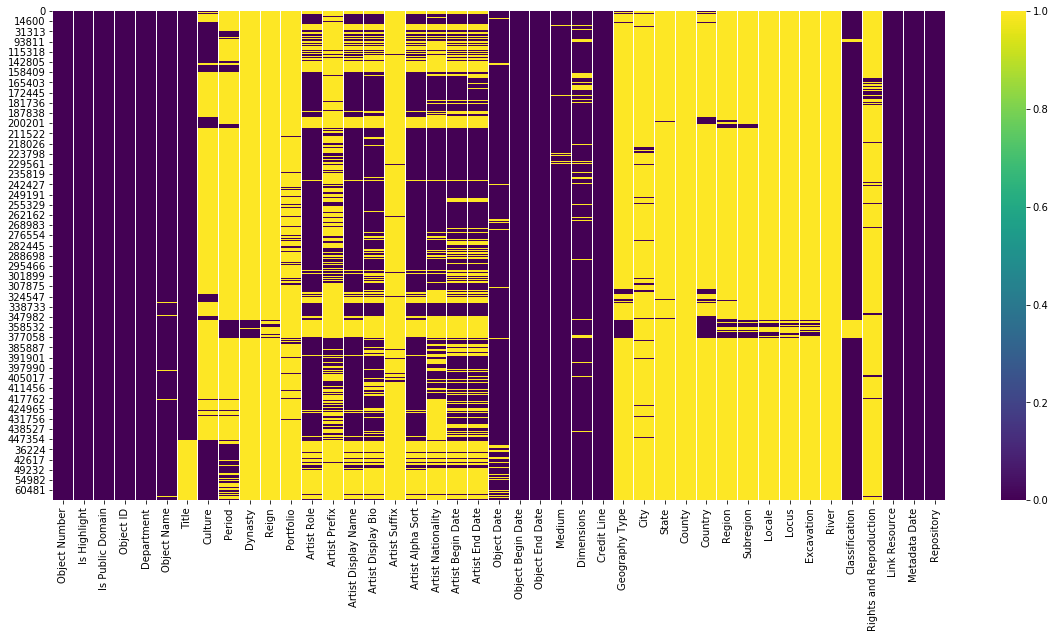

In [25]:
plt.figure(figsize=(20,9))
sb.heatmap(new_data.isnull(),cmap='viridis')

The plot above shows displays prevalence of missing values in the dataset. Each increment in the x-axis represents a variable in the dataset. Yellow values repressent missing values. Immediately we can see that some variables are consisted of mainly missing values, and some practically do not have non-missing values, like "County" or "River". 

To move forward, I will:
- briefly investigate variable with very few missing values to see, if it is possible to fill any gaps in,
- scan for numeric variables with missing values and see if it makes sense to impute them.

In [26]:
#frist variable with only few missing values
new_data['Object Name'].isnull().sum()
#there are 2,294 missing values

2294

In [27]:
new_data[new_data['Object Name'].isnull()][['Department','Object Name', 'Classification']]

,Department,Object Name,Classification
56261,Asian Art,NaN,Woodwork
63694,Asian Art,NaN,Paintings
63781,Asian Art,NaN,Illustrated Books
64998,Asian Art,NaN,Paintings
64999,Asian Art,NaN,Calligraphy
65000,Asian Art,NaN,Paintings
65001,Asian Art,NaN,Paintings
65002,Asian Art,NaN,Calligraphy
65003,Asian Art,NaN,Paintings
65004,Asian Art,NaN,Paintings


In [28]:
#could see how in other cases Object name was defined when Department was Asian Art and Classification
#of the artwork was a Painting
new_data[(new_data['Department']=='Asian Art') & (new_data['Classification']=='Paintings')][['Department','Object Name', 'Classification']]

,Department,Object Name,Classification
30318,Asian Art,Wall hanging,Paintings
30320,Asian Art,Hanging scroll,Paintings
30336,Asian Art,Folding fan mounted as an album leaf,Paintings
30354,Asian Art,Fan mounted as an album leaf,Paintings
30355,Asian Art,Album leaf,Paintings
30357,Asian Art,Fan mounted as an album leaf,Paintings
30358,Asian Art,Fan mounted as an album leaf,Paintings
30360,Asian Art,Hanging scroll,Paintings
30361,Asian Art,Handscroll,Paintings
30363,Asian Art,Hanging scroll,Paintings


In [29]:
#there are a lot of different options. But what are the most popular ones:
new_data[(new_data['Department']=='Asian Art') & (new_data['Classification']=='Paintings')]['Object Name'].value_counts()

Hanging scroll                                        1343
Folio                                                  462
Painting                                               349
Handscroll                                             294
Album leaf                                             276
Drawing                                                274
Folding fan mounted as an album leaf                   171
Album                                                  104
Fan mounted as an album leaf                            95
Tangka                                                  54
Hanging scrolls                                         43
Folding fan                                             40
Sheet from a sketchbook                                 28
Initiation card                                         26
Wall painting                                           26
Unmounted drawing                                       19
Drawing mounted as a hanging scroll                     

Seems like the options are very varied. There are two choices in this situation:

- Leave NaN as it is;
- Group Object Name as a variable irrespectively of anything else (as it does seem quite repetitive), and repeat the exercise again.

For now, I will repeat this exercise for the Sculpture classification, just to see maybe we can fill in some gaps there

In [30]:
new_data[(new_data['Department']=='Asian Art') & (new_data['Classification']=='Sculpture')]['Object Name'].value_counts()

Figure                     697
Head                       161
Statuette                  102
Figurine                    96
Plaque                      71
Relief                      71
Stele                       49
Relief fragment             46
Fragment                    35
Votive plaque               25
Bust                        24
Figures                     22
Reliquary                   22
Statue                      22
Sculpture                   19
Dish                        17
Votive tablet               16
Scholar's rock              16
Tile                        15
Headless figure             14
Mirror handle               13
Group                       13
Linga                       11
Lintel                      11
Haniwa head                 11
Mold                        10
Mask                        10
Figure fragment              8
Mold and impression          8
Shrine                       8
                          ... 
Water stone                  1
Spout   

Although less, there still seems to be quite a lot of variety how met defines the object names under the sculpture classification.

With that, will shift the analysis of the missing values in the classification column.

In [31]:
new_data['Classification'].isnull().sum()

10648

In [32]:
new_data[new_data['Classification'].isnull()]['Object Name']

66319                        Stomacher
66320                     Shoe Buckles
66322                            Cuffs
66325                             Sash
66326                             Veil
66328                             Cape
66329                         Pelerine
66331                            Fichu
66333                    Evening dress
66334                         Ensemble
66336                             Suit
66340                            Dress
66349                          Maillot
66350                 Evening ensemble
66351                           Jacket
66352                           Bikini
66364                        Beachwear
66373                          Sweater
66375                             Coat
66385                     Evening suit
66389                    Evening shoes
66394                            Pumps
66396                   Athletic shoes
66400                            Shirt
66401                           Shorts
66402                  At

In [33]:
#want to make sure I see all classifications
pd.set_option('display.max_rows', 1000)
#displays an entire list of classifications
new_data['Classification'].value_counts()

Prints                                                                   56354
Prints|Ephemera                                                          27944
Photographs                                                              20214
Drawings                                                                 19695
Books                                                                    13674
Paintings                                                                 9354
Photographs|Ephemera                                                      7742
Ceramics                                                                  7202
Textiles-Woven                                                            5009
Prints|Ornament & Architecture                                            3986
Sculpture                                                                 3784
Negatives                                                                 3689
Books|Prints|Ornament & Architecture                

A lot of values that are missing the Classification seem to be clothing items, for example, shorts. For the sake of example, I will add a classification to all "shorts" objects. 

Firstly, will quickly see, in case the there a shorts object that already has a classification:


In [34]:
new_data[new_data['Object Name'].str.contains("horts")==True]['Classification']

66401    NaN
66402    NaN
74093    NaN
93920    NaN
99029    NaN
99529    NaN
Name: Classification, dtype: object

In [35]:
new_data[new_data['Object Name'].str.contains("Dress|dress")==True][['Object Name','Classification']]
#while there is nothing that suggest particular classification for shorts, there are some options for dresses.

,Object Name,Classification
3199,Dresser,Furniture
3200,Dressing Glass,Furniture
3202,Dressing glass,Furniture
3203,Dressing stand,Furniture
3204,Dressing table,Furniture
3206,Dressing Table,Furniture
16201,Dress Pattern,Textiles
16600,Wedding dress,Textiles
16891,Dressing Table,Furniture
16894,Dressing Table,Furniture


In [36]:
#in particular
new_data[(new_data['Object Name'].str.contains("Dress|dress")==True) & (new_data['Classification'].notnull())]['Classification'].value_counts()

Wood-Sculpture                                  50
Jewelry                                         18
Furniture                                       13
Manuscript Materials                             8
Textiles-Woven                                   8
Stone Sculpture                                  7
Textiles                                         6
Textiles-Embroidered                             5
Woodwork-Furniture                               4
Hide-Costumes                                    4
Textiles-Costumes                                4
Textiles-Laces                                   3
Metalwork-Ornaments                              3
Textiles-Featherwork                             3
Metalwork-Silver                                 3
Gold and Silver                                  3
Jade                                             2
Feathers-Costumes                                2
Enamels-Cloisonné                                2
Shell-Ornaments                

In [37]:
#we will assign all missing dress classifications to "Textiles-Costumes" for all dress objects that do not have a classification
#which are:
new_data[(new_data['Object Name'].str.contains("Dress|dress")==True) & (new_data['Classification'].isnull())]['Object Name']
#these are mostly dress dresses

66333                                         Evening dress
66340                                                 Dress
66437                                   Fancy dress costume
66469                                             Headdress
66483                                                 Dress
66517                                          Dinner dress
66669                                        Cocktail Dress
66687                                             Coatdress
67096                                                 Dress
67177                                                 Dress
67450                                         Evening dress
67451                                         Evening dress
67737                                        Mourning Dress
67801                                                 Dress
67852                                                 Dress
67924                                         Wedding Dress
68173                                   

In [38]:
#making assigning the "textiles-Costumes" classification to where classification is missing and object is a dress
new_data.loc[((new_data['Object Name'].str.contains("Dress|dress")==True) & (new_data['Classification'].isnull()), 'Classification')] = "Textiles-Costumes"

In [39]:
#check it the change worked:
new_data[(new_data['Object Name'].str.contains("Dress|dress")==True) & (new_data['Classification'].isnull())]['Object Name']
#It worked! since there are no longer dress objects with missing classification

Series([], Name: Object Name, dtype: object)

In [40]:
#looks like there are a few "suit" objects that have a missing classifications. 
# a quick investigation, what kind of suits:
new_data[(new_data['Object Name'].str.contains("suit")==True) & (new_data['Classification'].isnull())]['Object Name']


66385               Evening suit
66406          Athletic jumpsuit
66535     Two-piece bathing suit
66537               Bathing suit
66576           Evening pantsuit
66657                   Bodysuit
66886                   Jumpsuit
66894                   Playsuit
67159                   Pantsuit
67263                  Tank suit
67356          Military Jumpsuit
67849                  Rain suit
68815              Toreador suit
68849                  Tank suit
69060               Morning suit
69083                Dinner suit
69168               Norfolk suit
69783                  Zoot suit
70069                   Pantsuit
70107                Lounge suit
70320               Hunting suit
70402                Sailor suit
70404              Skeleton suit
70639                   Ski suit
70685             Afternoon suit
72293               Bathing suit
72322           Evening jumpsuit
73234              Toreador suit
74515               Leisure suit
75385           Evening bodysuit
76306     

In [41]:
#seems the above can also easily be assigned to textiles-costumes classification:
new_data.loc[((new_data['Object Name'].str.contains("suit")==True) & (new_data['Classification'].isnull()), 'Classification')] = "Textiles-Costumes"

In [42]:
#there were also a few shoes in the list of objects with no classification.
#for those, the closest already existing classification is "Hide-Costumes|Accessory-Foot and Leg wear-Unisex"
#First, will explore the list, ensure all objects are shoes:
new_data[(new_data['Object Name'].str.contains("shoe")==True) & (new_data['Classification'].isnull())]['Object Name']
#yes, they are

66389     Evening shoes
66396    Athletic shoes
69151       Lotus shoes
80190     Hunting shoes
82779     Cycling shoes
82783     Golfing shoes
83112         Overshoes
84235        Rain shoes
84847      Tennis shoes
91323     Evening shoes
91533     Evening shoes
91534     Evening shoes
91802     Evening shoes
94021       Dance shoes
95204      Dinner shoes
96572     Walking shoes
97049     Evening shoes
Name: Object Name, dtype: object

In [43]:
#make the change, as highlighted above
new_data.loc[((new_data['Object Name'].str.contains("shoe")==True) & (new_data['Classification'].isnull()),'Classification')] = "Hide-Costumes|Accessory-Foot and Leg wear-Unisex"

In [44]:
new_data[(new_data['Object Name'].str.contains("shoe")==True) & (new_data['Classification'].isnull())]['Object Name']


Series([], Name: Object Name, dtype: object)

In [45]:
new_data['Classification'].isnull().sum()
#still quite a few to go, lets see what those objects look like

10334

In [46]:
new_data[new_data['Classification'].isnull()]['Object Name']
#these are mostly some sort of clothes - for the sake of moving on to new techniques, will leave it at that.

66319                                             Stomacher
66320                                          Shoe Buckles
66322                                                 Cuffs
66325                                                  Sash
66326                                                  Veil
66328                                                  Cape
66329                                              Pelerine
66331                                                 Fichu
66334                                              Ensemble
66336                                                  Suit
66349                                               Maillot
66350                                      Evening ensemble
66351                                                Jacket
66352                                                Bikini
66364                                             Beachwear
66373                                               Sweater
66375                                   

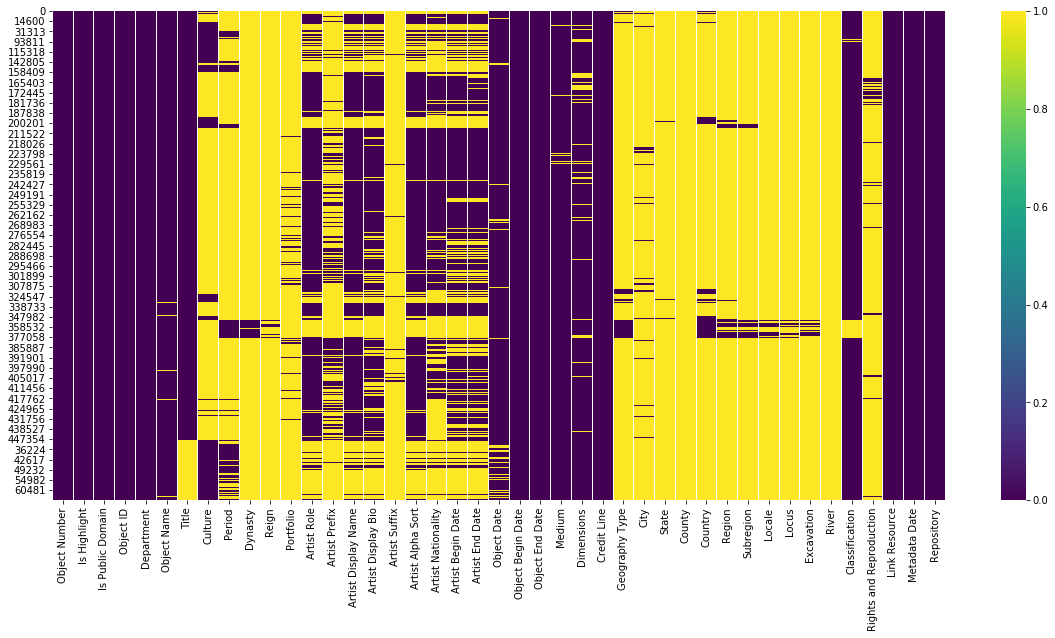

In [47]:
#does the classification column look at least a bit more purple?
plt.figure(figsize=(20,9))
sb.heatmap(new_data.isnull(),cmap='viridis')
#not really, but oh well.

In conclusion, in this particular missing values exercise from 10,648 missing values under classification, we got to 10,334 - small change, but enough to show how to go about it.

Now, let's see if it is possible to infer anything about the countyr of the artwork. In particular, looking at the artist name.

In [48]:
new_data.info()
#Country has many missing values: 234,102

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256851 entries, 0 to 445449
Data columns (total 43 columns):
Object Number              256851 non-null object
Is Highlight               256851 non-null bool
Is Public Domain           256851 non-null bool
Object ID                  256851 non-null int64
Department                 256851 non-null object
Object Name                254557 non-null object
Title                      225554 non-null object
Culture                    70918 non-null object
Period                     41039 non-null object
Dynasty                    7663 non-null object
Reign                      3563 non-null object
Portfolio                  16858 non-null object
Artist Role                188819 non-null object
Artist Prefix              69525 non-null object
Artist Display Name        189066 non-null object
Artist Display Bio         162083 non-null object
Artist Suffix              8924 non-null object
Artist Alpha Sort          189054 non-null object
Arti

In [49]:
#create a count for how many times an artist appears in the set
new_data['artist count'] = new_data.groupby(['Artist Display Name'])['Object Number'].transform("count")
#new_data.sort_values('Artist Display Name')[['Artist Display Name','Country']]
new_data[['Artist Display Name','artist count']].head()

,Artist Display Name,artist count
0,James Barton Longacre,2.0
1,Christian Gobrecht,4.0
2,NaN,NaN
9,Bela Lyon Pratt,5.0
10,Christian Gobrecht,4.0


In [50]:
#trying to create a process to check in case there is are any Artists that with some works have a country,
#and for some other works the country is missing

#first, create a variable that takes 1 if a country is missing
new_data['no country'] = 0
new_data.loc[new_data['Country'].isnull(),'no country'] = 1
new_data['no country'].value_counts()

1    234102
0     22749
Name: no country, dtype: int64

In [51]:
#create an grouped object, where by Artist name, we see thenumber of times an artist appears in the dataset vs
#the number of times there was no country next to the name
dfG = new_data.groupby('Artist Display Name', as_index=False)
dfG = dfG.agg( { 'artist count' : 'mean', 'no country': 'sum'}  )



,Artist Display Name,artist count,no country
0,"""Bodleian painter""",7.0,0
1,"""In Castel Durante"" Painter",2.0,2
2,"""In Castel Durante"" Painter|Maestro Giorgio An...",1.0,1
3,"""L""",1.0,1
4,"""Paris painter""",1.0,0


In [63]:
dfG.tail(15)

,Artist Display Name,artist count,no country
44833,Ōbaku Ingen,1.0,1
44834,Ōhara Donshū|Tanaka Nikka,1.0,1
44835,Ōhi Chōzaemon,1.0,1
44836,Ōide Tōkō,1.0,1
44837,Ōishi Matora,2.0,2
44838,Ōishi Shuga,1.0,1
44839,Ōnishi Chinnen,3.0,3
44840,Ōnishi Chinnen|Tani Bunchō,1.0,1
44841,Ōoka Shunboku,4.0,4
44842,Ōsako Mikio,1.0,1


In [52]:
#finally, we can check, if there are any artists where no country was market less than the number of times she/he
#appeared in the dataset
dfG[(dfG['no country'] < dfG['artist count']) & (dfG['no country']!=0)]
#looks like there are values where the country is missing for some of the artists

,Artist Display Name,artist count,no country
447,Abu'l Hasan,2.0,1
1026,Albert Bierstadt,134.0,133
1154,Albrecht Dürer,414.0,413
1304,Alex Katz,11.0,9
1367,Alexander Jackson Davis,160.0,159
1406,Alexander Liddle,2.0,1
1637,Alfred Rudolf Waud,3.0,2
2095,American Encaustic Tile Company,2.0,1
2416,Andrew Wyeth,9.0,8
3815,Archer and Warner,2.0,1


In [53]:
#let's see an example
new_data[new_data['Artist Display Name']=='Zarina'][['Artist Display Name', 'Country']]
#clearly, for this artist the missing country values can be changed to France.
#now, how to make this quick?

,Artist Display Name,Country
347284,Zarina,NaN
347285,Zarina,NaN
347288,Zarina,NaN
430333,Zarina,NaN
430334,Zarina,NaN
430335,Zarina,NaN
430337,Zarina,NaN
430338,Zarina,NaN
430339,Zarina,NaN
430340,Zarina,NaN


In [54]:
#to remedy this, will use Pandas built-in method for filling missing values. 
#This is a good method, because we can fill in values by group.
new_data['Country1'] = new_data.groupby('Artist Display Name')["Country"].ffill()
new_data['Country2'] = new_data.groupby('Artist Display Name')["Country"].bfill()

In [55]:
new_data['Country4'] = "NaN"

In [56]:
new_data.loc[((new_data['Country1'].isnull()),'Country4')] = new_data['Country2']

In [57]:
new_data.loc[((new_data['Country2'].isnull()),'Country4')] = new_data['Country1']

In [58]:
new_data.loc[((new_data['Country4']=="NaN"),'Country4')] = new_data['Country']

In [59]:
#testing the result
new_data[new_data['Artist Display Name']=='Alex Katz'][['Artist Display Name', 'Country','Country1','Country2','Country4']]

,Artist Display Name,Country,Country1,Country2,Country4
336285,Alex Katz,NaN,NaN,United States,United States
336331,Alex Katz,NaN,NaN,United States,United States
336332,Alex Katz,NaN,NaN,United States,United States
339875,Alex Katz,NaN,NaN,United States,United States
346290,Alex Katz,NaN,NaN,United States,United States
385302,Alex Katz,NaN,NaN,United States,United States
415095,Alex Katz,NaN,NaN,United States,United States
418407,Alex Katz,NaN,NaN,United States,United States
418408,Alex Katz,United States,United States,United States,United States
418948,Alex Katz,United States,United States,United States,United States


In [60]:
#testing a result with a different artist
new_data[new_data['Artist Display Name']=='Zarina'][['Artist Display Name', 'Country','Country1','Country2','Country4']]

,Artist Display Name,Country,Country1,Country2,Country4
347284,Zarina,NaN,NaN,France,France
347285,Zarina,NaN,NaN,France,France
347288,Zarina,NaN,NaN,France,France
430333,Zarina,NaN,NaN,France,France
430334,Zarina,NaN,NaN,France,France
430335,Zarina,NaN,NaN,France,France
430337,Zarina,NaN,NaN,France,France
430338,Zarina,NaN,NaN,France,France
430339,Zarina,NaN,NaN,France,France
430340,Zarina,NaN,NaN,France,France


In [65]:
new_data[new_data['Artist Display Name']=='Ōnishi Chinnen'][['Artist Display Name', 'Country','Country1','Country2','Country4']]
#looks like everything works fine

,Artist Display Name,Country,Country1,Country2,Country4
66028,Ōnishi Chinnen,NaN,NaN,NaN,NaN
66029,Ōnishi Chinnen,NaN,NaN,NaN,NaN
49834,Ōnishi Chinnen,NaN,NaN,NaN,NaN


In [66]:
new_data['Country'] = new_data['Country4']

In [69]:
new_data = new_data.drop(['Country1','Country2','Country4'], axis=1)
new_data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,artist count,no country
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY",2.0,1
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY",4.0,1
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY",NaN,1
9,1979.486.3,False,False,10,American Decorative Arts,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/10,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY",5.0,1
10,1979.486.2,False,False,11,American Decorative Arts,Coin,Two-and-a-half-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/11,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY",4.0,1


In [71]:
#final test
new_data[new_data['Artist Display Name']=='Zarina'][['Artist Display Name', 'Country']]

,Artist Display Name,Country
347284,Zarina,France
347285,Zarina,France
347288,Zarina,France
430333,Zarina,France
430334,Zarina,France
430335,Zarina,France
430337,Zarina,France
430338,Zarina,France
430339,Zarina,France
430340,Zarina,France


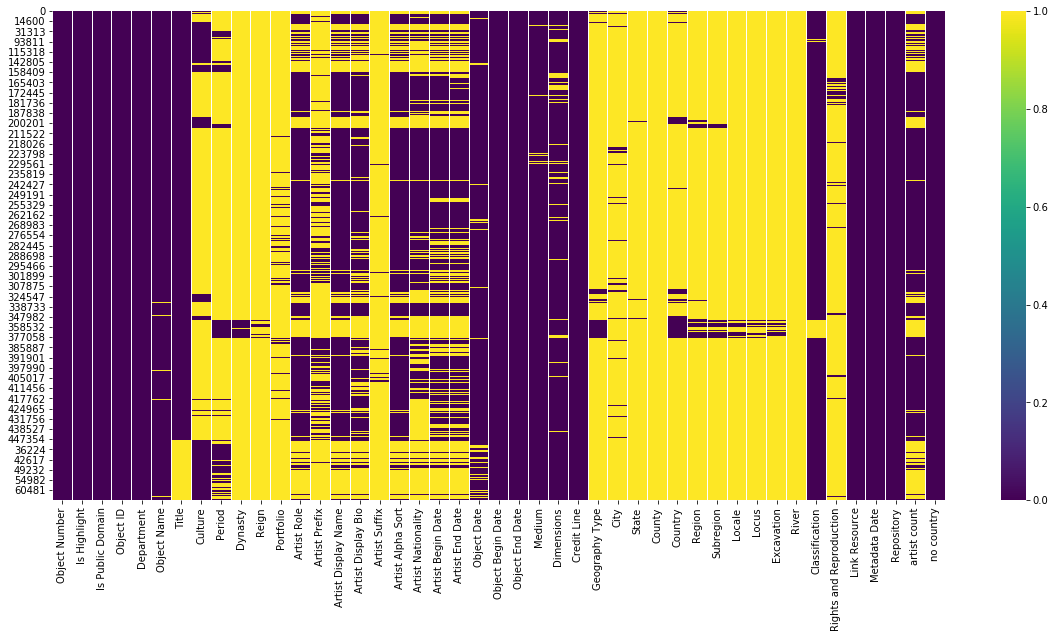

In [72]:
plt.figure(figsize=(20,9))
sb.heatmap(new_data.isnull(), cmap='viridis')

In [74]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256851 entries, 0 to 445449
Data columns (total 45 columns):
Object Number              256851 non-null object
Is Highlight               256851 non-null bool
Is Public Domain           256851 non-null bool
Object ID                  256851 non-null int64
Department                 256851 non-null object
Object Name                254557 non-null object
Title                      225554 non-null object
Culture                    70918 non-null object
Period                     41039 non-null object
Dynasty                    7663 non-null object
Reign                      3563 non-null object
Portfolio                  16858 non-null object
Artist Role                188819 non-null object
Artist Prefix              69525 non-null object
Artist Display Name        189066 non-null object
Artist Display Bio         162083 non-null object
Artist Suffix              8924 non-null object
Artist Alpha Sort          189054 non-null object
Arti

From the plot above, it is possible to see slightly how the purple area in the "Country" column has increased. In numbers, from 234,102 missing values, the texhnique applied reduced the missing values to 231,590, that is, by 2,512 values. 

A summary of steps followed:

- Identification of missing value using info(), developing the idea to fill missing values using Artist name.
- Testing the theory that some objects are missing Countries, although somewhere in a dataset there is an object with the same artist and non-missing country: 
    - Calculate how many times each artist appears in the dataset (A)
    - Calculate how many times for each artist the country is missing (B)
    - Compare the two metrics -  if (A)=(B), there is nothign we can do about it, if (B)<(A) - missing country values can be identified and filled.
- Using a pandas built-in fillna method, by Artist Name group, create new Country columns with filled in values.
- Combine newly Created country columns and replace the original Country column.

In conclusion, I tackled two issues:
 - Duplicates
 - Missing value
 
For duplicates, I investigated the dataset to come up with the conclusion that there are duplicate object titles under different Object IDs, Object numbers and resource links. By separating the untitled objects from the titled ones, I removed title duplicates from the latter subset. 

For missing values, I first demonstrated an example how to fill in missing Classification infomation based on the Object Names. On the second instance, I tackled missing Country infomation. 

While there are still quite a few missing values to work with, the techniques applied above (investigation using value_counts and the use of st.contains(), as well as fillna() ) would be what I would use to complete the entire dataset. 

Further cleaning can be done in grouping, since there are many object classes, and many object names are sinonymous.